In [90]:
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
%matplotlib inline
from pandas import read_excel
from datetime import datetime
from sklearn.preprocessing import StandardScaler
from scipy import stats
from sklearn.datasets import load_boston
import seaborn as scs

In [91]:
df = pd.read_excel("/content/dataset.xlsx")
df.head()

,Date,Time,Humidity (%),Temperature (*C),Gas (ppm)
0,2022-05-27 23:49:34.489,23:49:34,69.0,28.6,223.82
1,2022-05-27 23:49:39.269,23:49:39,69.0,28.5,2759.01
2,2022-05-27 23:49:50.270,23:49:50,69.0,28.5,1639.69
3,2022-05-27 23:49:57.329,23:49:57,69.0,28.5,1259.32
4,2022-05-27 23:50:11.326,23:50:11,69.0,28.6,923.81


In [67]:
df.dropna()
df.rename(columns = {'Gas (ppm)':'gasdata'}, inplace = True)
df['id'] = range(1, len(df) + 1)
del df["Time"]
del df["Date"]
df.describe()
df.head()

,Humidity (%),Temperature (*C),gasdata,id
0,69.0,28.6,223.82,1
1,69.0,28.5,2759.01,2
2,69.0,28.5,1639.69,3
3,69.0,28.5,1259.32,4
4,69.0,28.6,923.81,5


Text(0, 0.5, 'gasdata')

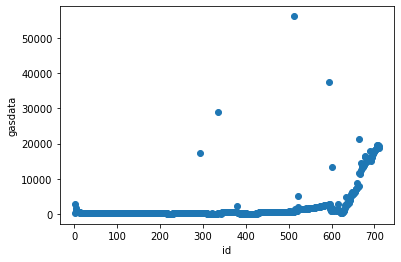

In [68]:
plt.scatter(df.id,df['gasdata'])
plt.xlabel('id')
plt.ylabel('gasdata')

In [16]:
z_scores = stats.zscore(df)
# calculate z-scores of `df`

# abs_z_scores = np.abs(z_scores)
# filtered_entries = (abs_z_scores < 3).all(axis=1)
# new_df = df[filtered_entries]
# df[(np.abs(stats.zscore(df)) < 3).all(axis=1)]
# df
# df[np.abs(df.gasdata-df.gasdata.mean()) <= (3*df.gasdata.std())]
# df[~(np.abs(df.gasdata-df.gasdata.mean()) > (3*df.gasdata.std()))]
# df

,Humidity (%),Temperature (*C),gasdata,id
0,69.0,28.6,223.82,1
1,69.0,28.5,2759.01,2
2,69.0,28.5,1639.69,3
3,69.0,28.5,1259.32,4
4,69.0,28.6,923.81,5
...,...,...,...,...
706,69.0,31.2,19572.20,707
707,69.0,31.3,19572.20,708
708,69.0,31.3,19359.56,709
709,69.0,31.3,19359.56,710


In [18]:
dx=df[df[(np.abs(stats.zscore(df)) < 3).all(axis=1)]]
df

,Humidity (%),Temperature (*C),gasdata,id
0,69.0,28.6,223.82,1
1,69.0,28.5,2759.01,2
2,69.0,28.5,1639.69,3
3,69.0,28.5,1259.32,4
4,69.0,28.6,923.81,5
...,...,...,...,...
706,69.0,31.2,19572.20,707
707,69.0,31.3,19572.20,708
708,69.0,31.3,19359.56,709
709,69.0,31.3,19359.56,710


,Humidity (%),Temperature (*C),gasdata,id
0,0.023863,-1.680027,-0.372064,-1.729616
1,0.023863,-1.811786,0.146322,-1.724744
2,0.023863,-1.811786,-0.082552,-1.719872
3,0.023863,-1.811786,-0.160329,-1.715000
4,0.023863,-1.680027,-0.228933,-1.710128
...,...,...,...,...
661,0.023863,1.613961,1.237424,1.490881
662,0.023863,1.745721,1.218434,1.495753
664,0.023863,1.613961,1.990027,1.505497
665,0.023863,1.613961,1.884368,1.510369


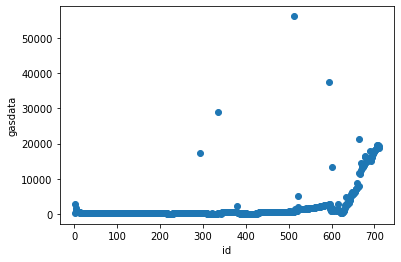

In [78]:
plt.scatter(df.id,df['gasdata'])
plt.xlabel('id')
plt.ylabel('gasdata')
zscore_df = pd.DataFrame(stats.zscore(df.fillna(df.mean())), index=df.index, columns=df.columns).where(df.notna())
zscore_df
df3 = zscore_df[~(zscore_df['gasdata'] >= 2)]  
df3


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


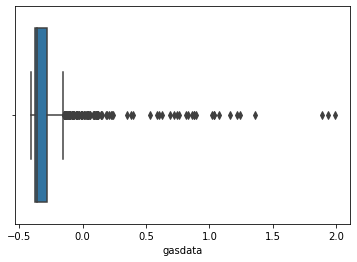

In [80]:
scs.boxplot(df3['gasdata'])

In [81]:
# z = (stats.zscore(df.gasdata))
# z
df['zscore'] = (df.gasdata - df.gasdata.mean())/df.gasdata.std(ddof=0)
df
df.zscore.describe()

count    7.100000e+02
mean     3.296268e-16
std      1.000705e+00
min     -4.108336e-01
25%     -3.728115e-01
50%     -3.532324e-01
75%     -1.966200e-01
max      1.104978e+01
Name: zscore, dtype: float64

In [33]:
zscore_df = pd.DataFrame(stats.zscore(df.fillna(df.mean())), index=df.index, columns=df.columns).where(df.notna())

In [64]:
zscore_df

,Humidity (%),Temperature (*C),gasdata,zscore,id
225,NaN,NaN,NaN,NaN,226
292,0.023863,-0.889470,3.130261,3.130261,293
333,0.331908,-1.943546,5.500455,5.500455,334
512,-0.900273,0.296366,11.057555,11.057555,513
594,0.331908,-0.625951,7.256996,7.256996,595
663,0.023863,1.613961,3.949079,3.949079,664
688,0.023863,1.745721,3.248898,3.248898,689
695,0.023863,1.745721,3.053224,3.053224,696
696,0.023863,1.745721,3.130261,3.130261,697
697,0.023863,1.745721,3.169391,3.169391,698


In [92]:
# del df["id"]
# df
# del zscore_df['id']
zscore_df
zscore_df['id'] = range(1, len(df) + 1)
zscore_df

,Humidity (%),Temperature (*C),gasdata,id
0,0.023863,-1.680027,-0.372064,1
1,0.023863,-1.811786,0.146322,2
2,0.023863,-1.811786,-0.082552,3
3,0.023863,-1.811786,-0.160329,4
4,0.023863,-1.680027,-0.228933,5
...,...,...,...,...
706,0.023863,1.745721,3.584216,707
707,0.023863,1.877480,3.584216,708
708,0.023863,1.877480,3.540736,709
709,0.023863,1.877480,3.540736,710


,Humidity (%),Temperature (*C),gasdata,id
0,0.023863,-1.680027,-0.372064,-1.729616
1,0.023863,-1.811786,0.146322,-1.724744
2,0.023863,-1.811786,-0.082552,-1.719872
3,0.023863,-1.811786,-0.160329,-1.715000
4,0.023863,-1.680027,-0.228933,-1.710128
...,...,...,...,...
661,0.023863,1.613961,1.237424,1.490881
662,0.023863,1.745721,1.218434,1.495753
664,0.023863,1.613961,1.990027,1.505497
665,0.023863,1.613961,1.884368,1.510369


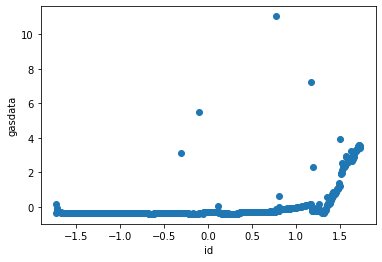

In [84]:
plt.scatter(zscore_df.id,zscore_df['gasdata'])
plt.xlabel('id')
plt.ylabel('gasdata')
zscore_df
df3

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


,Humidity (%),Temperature (*C),gasdata,id,ids
count,660.000000,660.000000,660.000000,661.000000,661.000000
mean,0.002860,-0.116880,-0.243841,-0.114529,331.000000
std,1.033506,0.918463,0.295271,0.937655,190.958547
min,-3.980725,-2.075305,-0.411123,-1.729616,1.000000
25%,-0.284183,-0.757710,-0.373074,-0.925710,166.000000
50%,0.023863,-0.230672,-0.358577,-0.116932,331.000000
75%,0.331908,0.164607,-0.284456,0.691847,496.000000
max,2.180179,3.195076,1.990027,1.515241,661.000000


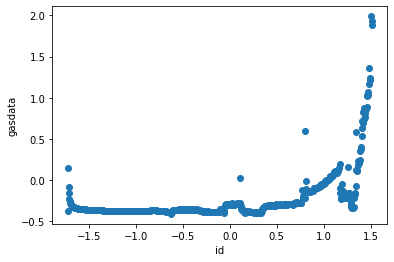

In [86]:
# zscore_df[(np.abs(stats.zscore(zscore_df)) < 3).all(axis=1)]
# zscore_df
# fe= (zscore_df.gasdata< 3)
# fe
# zscore_df.drop(zscore_df[zscore_df['gasdata'] <3].index, inplace = True)
# zscore_df
df3['ids'] = range(1, len(df3) + 1)
plt.scatter(df3.id,df3['gasdata'])
plt.xlabel('id')
plt.ylabel('gasdata')
df3.describe()

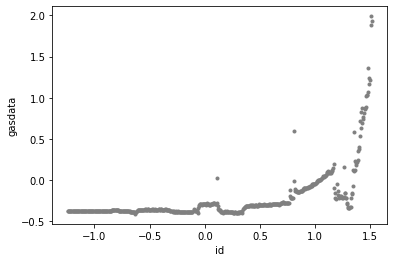

In [104]:
dfx = df3[:100]
dfy = df3[220:440]
dfz = df3[440:]
dfw=df3[100:]
import matplotlib.pyplot as plt
%matplotlib inline
plt.xlabel('id')
plt.ylabel('gasdata')
# plt.scatter(dfx['id'], dfx['gasdata'],color="green",marker='+')
# plt.scatter(dfy['id'], dfy['gasdata'],color="blue",marker='.')
# plt.scatter(dfz['id'], dfz['gasdata'],color="gray",marker='.')
plt.scatter(dfw['id'], dfw['gasdata'],color="gray",marker='.')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


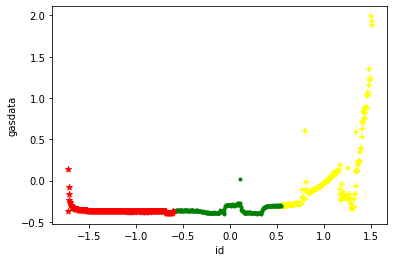

In [132]:

# print(df3.to_string())
# dfw.dropna(how='all', inplace=True)




# dfy.drop([225,226], axis=0, inplace=True)
# print(dfy.to_string())
# df3.drop([225,226], axis=0, inplace=True)
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df3[['id','gasdata']])

df3['y_predicted']=y_predicted
df3

df4= df3[df3['y_predicted']==0]
df5= df3[df3['y_predicted']==1]
df6= df3[df3['y_predicted']==2]
plt.xlabel('id')
plt.ylabel('gasdata')
plt.scatter(df4['id'], df4['gasdata'],color="yellow",marker='+')
plt.scatter(df5['id'], df5['gasdata'],color="green",marker='.')
plt.scatter(df6['id'], df6['gasdata'],color="red",marker='*')

In [142]:

from sklearn.model_selection import train_test_split
# X=df3.y_predicted
# Y=df3.id

In [155]:
len(X_test)
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=10)
# knn.fit(X_train, y_train)
dfl=pd.DataFrame(df3['y_predicted'])
X=dfl
# Y=pd.DataFrame(df3['ids'])
Y=df3['ids']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1)

dfl
#knn.score(X_test, y_test)


,y_predicted
0,2
1,2
2,2
3,2
4,2
...,...
661,0
662,0
664,0
665,0


In [156]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [157]:

print(y_test)

0.0

In [158]:
#import required packages
from sklearn import neighbors
from sklearn.metrics import mean_squared_error 
from math import sqrt
import matplotlib.pyplot as plt
%matplotlib inline

In [159]:
rmse_val = [] #to store rmse values for different k
for K in range(20):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)

    model.fit(X_train, y_train)  #fit the model
    pred=model.predict(X_test) #make prediction on test set
    error = sqrt(mean_squared_error(y_test,pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  1 is: 92.99160926631711
RMSE value for k=  2 is: 68.86705828748399
RMSE value for k=  3 is: 75.84956536234446
RMSE value for k=  4 is: 77.18926382272959
RMSE value for k=  5 is: 71.34251569334057
RMSE value for k=  6 is: 66.15368716463952
RMSE value for k=  7 is: 65.22550594236931
RMSE value for k=  8 is: 62.81128541717305
RMSE value for k=  9 is: 62.24535454645425
RMSE value for k=  10 is: 62.64029264480062
RMSE value for k=  11 is: 63.559825742114626
RMSE value for k=  12 is: 63.07725063967501
RMSE value for k=  13 is: 63.649054273068
RMSE value for k=  14 is: 63.674410321475875
RMSE value for k=  15 is: 64.1896343520444
RMSE value for k=  16 is: 63.29573838070847
RMSE value for k=  17 is: 62.78505927225098
RMSE value for k=  18 is: 62.22718309348491
RMSE value for k=  19 is: 61.92125411146136
RMSE value for k=  20 is: 61.851224439346915


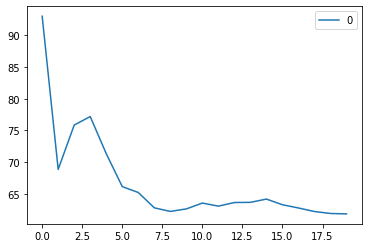

In [161]:
#plotting the rmse values against k values
curve = pd.DataFrame(rmse_val) #elbow curve 
curve.plot()
curve=pd.DataFrame(rmse_val)
curve.plot()


In [164]:
predict = model.predict(X)